<a href="https://colab.research.google.com/github/LuvTheCoder/StockPrediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

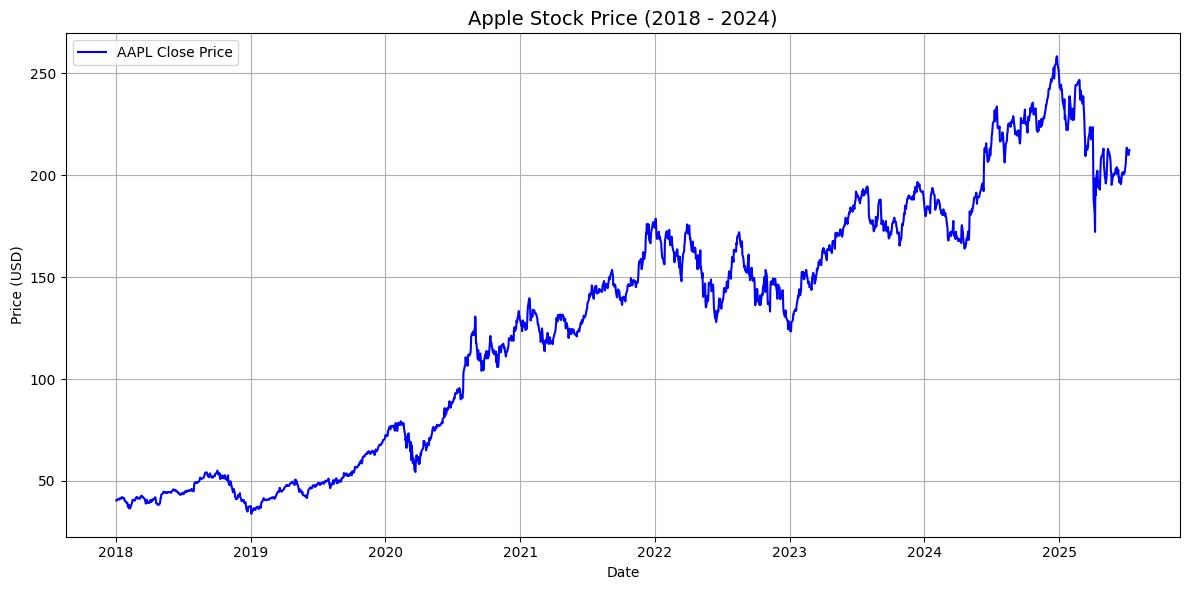

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], color='blue', label='AAPL Close Price')
plt.title('Apple Stock Price (2018 - 2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
ticker = 'AAPL'
data = yf.download(ticker, start='2018-01-01', end='2025-7-11')

data = data[['Close']]
data.dropna(inplace=True)


/tmp/ipython-input-30-1386430507.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end='2025-7-11')
[*********************100%***********************]  1 of 1 completed


In [31]:
data.tail()

Price,Close
Ticker,AAPL
Date,
2025-07-03,213.550003
2025-07-07,209.949997
2025-07-08,210.009995
2025-07-09,211.139999
2025-07-10,212.410004


In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [33]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

# Reshape for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

In [34]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0286 - val_loss: 0.0019
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065 - val_loss: 0.0028
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

In [38]:
last_60_days = scaled_data[-60:]
last_60_days = last_60_days.reshape((1, window_size, 1))

# Predict
predicted_scaled_price = model.predict(last_60_days)
predicted_price = scaler.inverse_transform(predicted_scaled_price)

print(f"Predicted Close Price for July 12, 2024: ${predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Close Price for July 12, 2024: $209.73


In [39]:
predictions = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


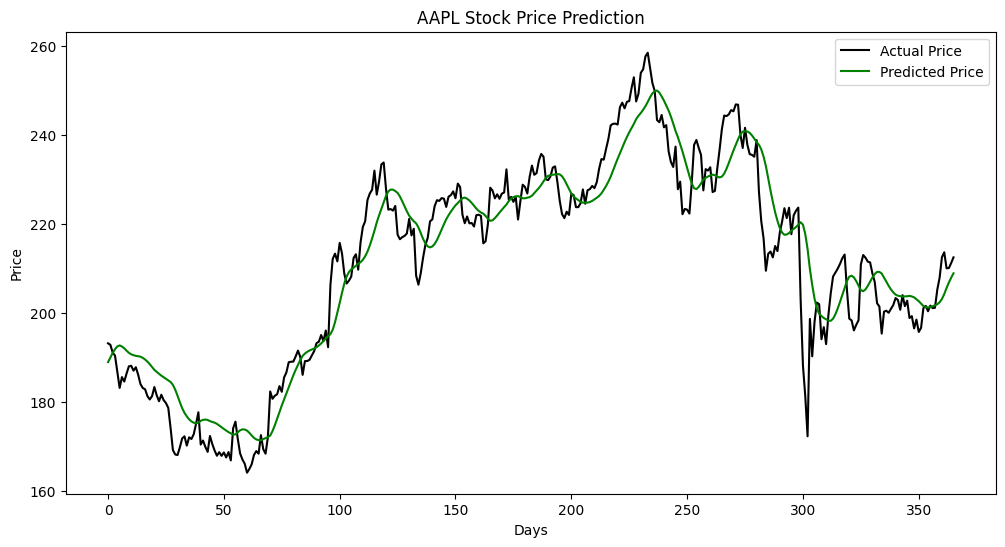

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='black', label='Actual Price')
plt.plot(predicted_prices, color='green', label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

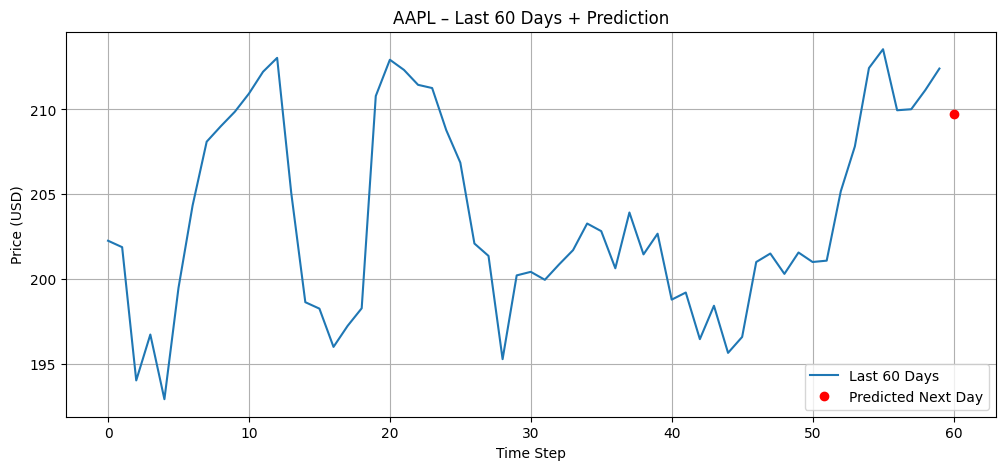

In [42]:
last_60_days_scaled = scaler.inverse_transform(last_60_days.reshape(-1, 1))

future = np.append(last_60_days_scaled, predicted_price)

plt.figure(figsize=(12, 5))
plt.plot(range(60), last_60_days_scaled, label="Last 60 Days")
plt.plot(60, predicted_price[0][0], 'ro', label="Predicted Next Day")
plt.title(f"{ticker} – Last 60 Days + Prediction")
plt.xlabel("Time Step")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

**Last N-days**

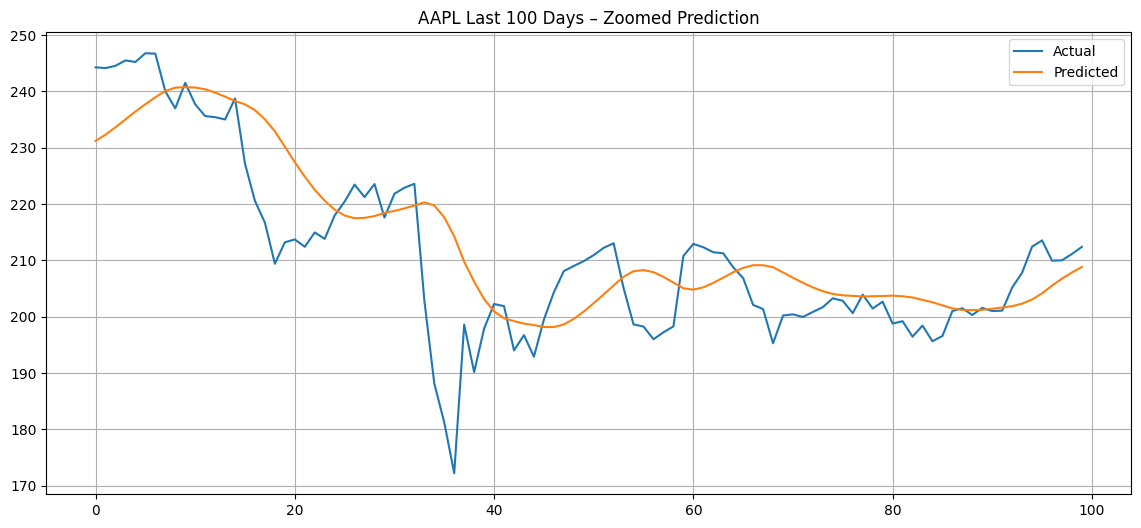

In [43]:
n = 100
plt.figure(figsize=(14, 6))
plt.plot(y_test_scaled[-n:], label='Actual')
plt.plot(predictions[-n:], label='Predicted')
plt.title(f"{ticker} Last {n} Days – Zoomed Prediction")
plt.legend()
plt.grid(True)
plt.show()

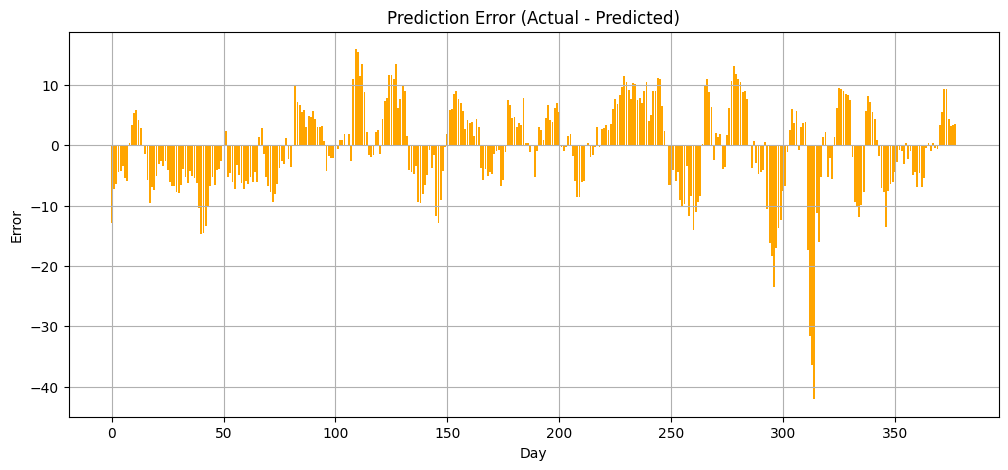

In [44]:
errors = y_test_scaled.flatten() - predictions.flatten()

plt.figure(figsize=(12, 5))
plt.bar(range(len(errors)), errors, color='orange')
plt.title("Prediction Error (Actual - Predicted)")
plt.xlabel("Day")
plt.ylabel("Error")
plt.grid(True)
plt.show()

In [45]:
import plotly.graph_objs as go

test_dates = df.index[-len(predictions):]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=test_dates,
    y=y_test_scaled.flatten(),
    mode='lines+markers',
    name='Actual',
    hovertemplate='Date: %{x}<br>Actual Price: %{y:.2f}<extra></extra>'
))


fig.add_trace(go.Scatter(
    x=test_dates,
    y=predictions.flatten(),
    mode='lines+markers',
    name='Predicted',
    hovertemplate='Date: %{x}<br>Predicted Price: %{y:.2f}<extra></extra>'
))

fig.update_layout(
    title=f"{ticker} Interactive Prediction",
    xaxis_title="Date",
    yaxis_title="Stock Price (USD)",
    hovermode="x unified",
    template="plotly_dark"
)


fig.show()